# 🎯Service Desk Ticket Analysis Using Machine Learning 

In [38]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


In [39]:
# csv file loading with pandas
df=pd.read_csv(r"D:\GRADIOUS\PROJECT\Desk Ticket Analysis.csv")
df.head()

C:\Users\junaid\AppData\Local\Temp\ipykernel_10572\1441218512.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"D:\GRADIOUS\PROJECT\Desk Ticket Analysis.csv")


,Asset_ID,Asset_Group,Asset_Subtype,Budget_Code,Ticket_ID,Ticket_State,Business_Impact,Time_Criticality,Response_Priority,Client_Contact_Score,...,Reinitiated_At,Solution_Completed_At,Final_Closure_At,Effort_Duration_Hrs,Closure_Rationale,Interaction_Tally,Interaction_Ref,Incident_Link_Count,Change_Link_Count,Change_Ref_ID
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,...,NaN,04/11/2013 13:50,04/11/2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,...,02/12/2013 12:31,02/12/2013 12:36,02/12/2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,...,NaN,13/01/2014 15:12,13/01/2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,...,NaN,14/11/2013 09:31,14/11/2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,...,NaN,08/11/2013 13:55,08/11/2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN


In [40]:
df.describe()

,Response_Priority,Client_Contact_Score,Team_Reassignments,Interaction_Tally,Incident_Link_Count,Change_Link_Count
count,45226.000000,46606.000000,46605.000000,46492.000000,1222.000000,560.000000
mean,4.215805,0.499658,1.131831,1.149897,1.669394,1.058929
std,0.705624,0.288634,2.269774,2.556338,3.339687,0.403596
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248213,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500269,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749094,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Asset_ID               46606 non-null  object 
 1   Asset_Group            46495 non-null  object 
 2   Asset_Subtype          46495 non-null  object 
 3   Budget_Code            46606 non-null  object 
 4   Ticket_ID              46606 non-null  object 
 5   Ticket_State           46606 non-null  object 
 6   Business_Impact        46606 non-null  object 
 7   Time_Criticality       46606 non-null  object 
 8   Response_Priority      45226 non-null  float64
 9   Client_Contact_Score   46606 non-null  float64
 10  Issue_Type             46606 non-null  object 
 11  Knowledge_Link_ID      46606 non-null  object 
 12  Monitoring_Origin      46606 non-null  object 
 13  Team_Reassignments     46605 non-null  float64
 14  Logged_At              46606 non-null  object 
 15  Re

In [42]:
# checking dupliacates

df.duplicated().sum()

np.int64(0)

In [43]:
df.isnull().sum()

Asset_ID                     0
Asset_Group                111
Asset_Subtype              111
Budget_Code                  0
Ticket_ID                    0
Ticket_State                 0
Business_Impact              0
Time_Criticality             0
Response_Priority         1380
Client_Contact_Score         0
Issue_Type                   0
Knowledge_Link_ID            0
Monitoring_Origin            0
Team_Reassignments           1
Logged_At                    0
Reinitiated_At           44322
Solution_Completed_At     1780
Final_Closure_At             0
Effort_Duration_Hrs          1
Closure_Rationale          460
Interaction_Tally          114
Interaction_Ref              0
Incident_Link_Count      45384
Change_Link_Count        46046
Change_Ref_ID            46046
dtype: int64

In [44]:
# dropping high null coulumns 
df=df.drop(['Change_Ref_ID', 'Change_Link_Count', 'Incident_Link_Count', 'Reinitiated_At','Interaction_Ref'],axis=1)

# dropping unwanted columns
df=df.drop(['Ticket_ID','Monitoring_Origin','Knowledge_Link_ID'],axis=1)

In [45]:
df

,Asset_ID,Asset_Group,Asset_Subtype,Budget_Code,Ticket_State,Business_Impact,Time_Criticality,Response_Priority,Client_Contact_Score,Issue_Type,Team_Reassignments,Logged_At,Solution_Completed_At,Final_Closure_At,Effort_Duration_Hrs,Closure_Rationale,Interaction_Tally
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4.0,0.601292,incident,26.0,05/02/2012 13:32,04/11/2013 13:50,04/11/2013 13:51,"3,87,16,91,111",Other,1.0
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3.0,0.415050,incident,33.0,12/03/2012 15:44,02/12/2013 12:36,02/12/2013 12:36,"4,35,47,86,389",Software,1.0
2,DTA000024,application,Desktop Application,WBS000092,Closed,NS,3,NaN,0.517551,request for information,3.0,29/03/2012 12:36,13/01/2014 15:12,13/01/2014 15:13,"4,84,31,19,444",No error - works as designed,1.0
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.642927,incident,13.0,17/07/2012 11:49,14/11/2013 09:31,14/11/2013 09:31,"4,32,18,33,333",Operator error,1.0
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.345258,incident,2.0,10/08/2012 11:01,08/11/2013 13:55,08/11/2013 13:55,"3,38,39,03,333",Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,Closed,4,4,4.0,0.231896,incident,0.0,31/03/2014 16:23,31/03/2014 16:29,31/03/2014 16:29,"0,095",Other,1.0
46602,SBA000461,application,Server Based Application,WBS000073,Closed,4,4,4.0,0.805153,incident,0.0,31/03/2014 15:03,31/03/2014 15:29,31/03/2014 15:29,"0,428333333",User error,1.0
46603,LAP000019,computer,Laptop,WBS000091,Closed,5,5,5.0,0.917466,incident,0.0,31/03/2014 15:28,31/03/2014 15:32,31/03/2014 15:32,"0,071666667",Hardware,1.0
46604,WBA000058,application,Web Based Application,WBS000073,Closed,4,4,4.0,0.701278,incident,0.0,31/03/2014 15:35,31/03/2014 15:42,31/03/2014 15:42,"0,116944444",Software,1.0


In [46]:
for i in df.columns:
    print(f'{i}: {df[i].nunique()} unique values , they are : {df[i].unique()}',end='\n\n')

Asset_ID: 3019 unique values , they are : ['SUB000508' 'WBA000124' 'DTA000024' ... 'CBD000595' 'CBD000443'
 'SWT000008']

Asset_Group: 12 unique values , they are : ['subapplication' 'application' 'computer' nan 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']

Asset_Subtype: 64 unique values , they are : ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' nan 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Omgeving' 'MigratieDummy' 'Scanner' 'Controller'
 'DataCenterEquipment' 'KVM Switches' 'Switch' 'Database Software'
 'Network Component' 'Unix Server' 'Lines' 'ESX Cluster' 'zOS Server'
 'SharePoint Farm' 'NonStop Server' 'Application Server'
 'Security Soft

In [47]:
df

,Asset_ID,Asset_Group,Asset_Subtype,Budget_Code,Ticket_State,Business_Impact,Time_Criticality,Response_Priority,Client_Contact_Score,Issue_Type,Team_Reassignments,Logged_At,Solution_Completed_At,Final_Closure_At,Effort_Duration_Hrs,Closure_Rationale,Interaction_Tally
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4.0,0.601292,incident,26.0,05/02/2012 13:32,04/11/2013 13:50,04/11/2013 13:51,"3,87,16,91,111",Other,1.0
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3.0,0.415050,incident,33.0,12/03/2012 15:44,02/12/2013 12:36,02/12/2013 12:36,"4,35,47,86,389",Software,1.0
2,DTA000024,application,Desktop Application,WBS000092,Closed,NS,3,NaN,0.517551,request for information,3.0,29/03/2012 12:36,13/01/2014 15:12,13/01/2014 15:13,"4,84,31,19,444",No error - works as designed,1.0
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.642927,incident,13.0,17/07/2012 11:49,14/11/2013 09:31,14/11/2013 09:31,"4,32,18,33,333",Operator error,1.0
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4.0,0.345258,incident,2.0,10/08/2012 11:01,08/11/2013 13:55,08/11/2013 13:55,"3,38,39,03,333",Other,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,Closed,4,4,4.0,0.231896,incident,0.0,31/03/2014 16:23,31/03/2014 16:29,31/03/2014 16:29,"0,095",Other,1.0
46602,SBA000461,application,Server Based Application,WBS000073,Closed,4,4,4.0,0.805153,incident,0.0,31/03/2014 15:03,31/03/2014 15:29,31/03/2014 15:29,"0,428333333",User error,1.0
46603,LAP000019,computer,Laptop,WBS000091,Closed,5,5,5.0,0.917466,incident,0.0,31/03/2014 15:28,31/03/2014 15:32,31/03/2014 15:32,"0,071666667",Hardware,1.0
46604,WBA000058,application,Web Based Application,WBS000073,Closed,4,4,4.0,0.701278,incident,0.0,31/03/2014 15:35,31/03/2014 15:42,31/03/2014 15:42,"0,116944444",Software,1.0


## DATA CLEANING♦️ AND PREPROCESSING♦️

In [48]:
# removing leading 0's so that we can convert the column to numeric

df['Effort_Duration_Hrs'] = df['Effort_Duration_Hrs'].str.replace(',', '', regex=False)
df['Effort_Duration_Hrs'] = df['Effort_Duration_Hrs'].astype(str).str.lstrip('0')
df['Effort_Duration_Hrs'] = pd.to_numeric(df['Effort_Duration_Hrs'], errors='coerce')

In [49]:
df['Business_Impact']=df['Business_Impact'].replace('NS','0')
df['Business_Impact']=df['Business_Impact'].astype(int)

In [50]:
df['Team_Reassignments']=df['Team_Reassignments'].fillna(0)  #as there is no team reassignments we can fill it with 0
df['Team_Reassignments']=df['Team_Reassignments'].astype(int)

In [51]:
df['Business_Impact']=df['Business_Impact'].replace('NS','0')        # NS means No Service Impact so we can replace it with 0
df['Business_Impact']=df['Business_Impact'].astype(int)

In [52]:
df['Time_Criticality']=df['Time_Criticality'].replace({'5':1, '4':2, '3':3, '2':4, '1':5,'5 - Very Low':1})              #as less urgent value should be lesser 
df['Time_Criticality'].dtype

C:\Users\junaid\AppData\Local\Temp\ipykernel_10572\3032248722.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Time_Criticality']=df['Time_Criticality'].replace({'5':1, '4':2, '3':3, '2':4, '1':5,'5 - Very Low':1})              #as less urgent value should be lesser


dtype('int64')

In [53]:
df['Response_Priority']=df['Response_Priority'].fillna(-1)                ## as there is no business impact there is no need to respond . thats what we can conclude from data
df['Response_Priority']=df['Response_Priority'].astype(int)


In [54]:
df['Closure_Rationale']=df['Closure_Rationale'].replace({"Overig":"Other","Kwaliteit van de output":"Quality of the output","No error - works as designed":"No error"}) # transliting from dutch to english
df['Closure_Rationale']=df['Closure_Rationale'].fillna("Unknown")                         #missing values are replaced with unknown

### converting date columns to datetime format⚡

In [55]:
date_columns=['Final_Closure_At','Solution_Completed_At','Logged_At']
for col in date_columns:
    #Convert from date/month/year format to datetime
    # pandas inbuilt date time has format month date year so we need to convert it
    # to the format of day/month/year
    df[col] = pd.to_datetime(df[col], format='%d/%m/%Y %H:%M', errors='coerce')

    # df[col]=pd.to_datetime(df[col],errors="coerce")  #converting to datetime format
    ## extracting hours,days and months from date columns
    df['ticket_hour']= df[col].dt.hour
    df['ticket_dayofweek']= df[col].dt.day_of_week
    df['ticket_month']= df[col].dt.month


In [56]:
df.isnull().sum()

Asset_ID                    0
Asset_Group               111
Asset_Subtype             111
Budget_Code                 0
Ticket_State                0
Business_Impact             0
Time_Criticality            0
Response_Priority           0
Client_Contact_Score        0
Issue_Type                  0
Team_Reassignments          0
Logged_At                   0
Solution_Completed_At    1780
Final_Closure_At            0
Effort_Duration_Hrs       237
Closure_Rationale           0
Interaction_Tally         114
ticket_hour                 0
ticket_dayofweek            0
ticket_month                0
dtype: int64

## 🪄Handling missing values

In [57]:
## imputaion  with mode for: df['Asset_Group','Asset_Subtype','Interaction_Tally']

for col in ['Asset_Group','Asset_Subtype','Interaction_Tally']:
    df[col]=df[col].fillna(df[col].mode()[0])

In [58]:
# the missing value cant be handled with mode so we will drop those rows 

df=df.dropna(subset=['Solution_Completed_At','Effort_Duration_Hrs'])      


In [59]:
df.isnull().sum()                                # all missing values are handled . There are no missing values now

Asset_ID                 0
Asset_Group              0
Asset_Subtype            0
Budget_Code              0
Ticket_State             0
Business_Impact          0
Time_Criticality         0
Response_Priority        0
Client_Contact_Score     0
Issue_Type               0
Team_Reassignments       0
Logged_At                0
Solution_Completed_At    0
Final_Closure_At         0
Effort_Duration_Hrs      0
Closure_Rationale        0
Interaction_Tally        0
ticket_hour              0
ticket_dayofweek         0
ticket_month             0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44606 entries, 0 to 46605
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Asset_ID               44606 non-null  object        
 1   Asset_Group            44606 non-null  object        
 2   Asset_Subtype          44606 non-null  object        
 3   Budget_Code            44606 non-null  object        
 4   Ticket_State           44606 non-null  object        
 5   Business_Impact        44606 non-null  int64         
 6   Time_Criticality       44606 non-null  int64         
 7   Response_Priority      44606 non-null  int64         
 8   Client_Contact_Score   44606 non-null  float64       
 9   Issue_Type             44606 non-null  object        
 10  Team_Reassignments     44606 non-null  int64         
 11  Logged_At              44606 non-null  datetime64[ns]
 12  Solution_Completed_At  44606 non-null  datetime64[ns]
 13  Final_

## performing EDA 🪄. exploring data with some visualizations

Text(0.5, 1.0, 'Priority Levels across Business Impact')

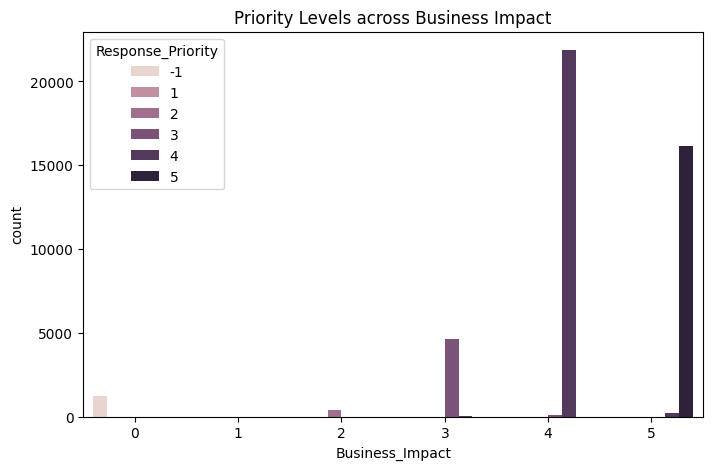

In [61]:
# business impact vs priority

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Business_Impact', hue='Response_Priority')
plt.title("Priority Levels across Business Impact")


### Correlations Between Numeric Features

Text(0.5, 1.0, 'Correlation Heatmap')

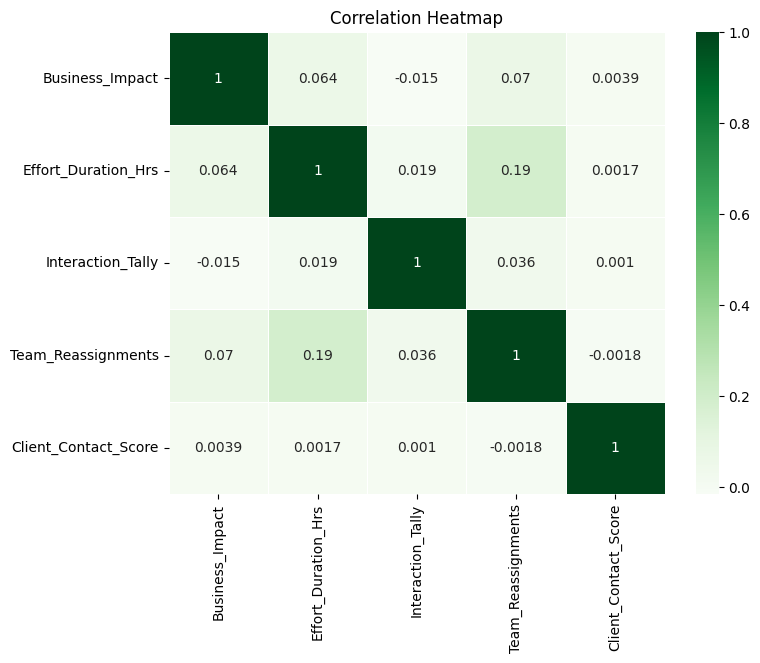

In [62]:
num_cols = ['Business_Impact', 'Effort_Duration_Hrs', 'Interaction_Tally', 'Team_Reassignments','Client_Contact_Score']
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Greens", linewidths=0.5)
plt.title("Correlation Heatmap")


### Weekly Patterns of Ticket Logging

Text(0.5, 1.0, 'Tickets Logged by Weekday')

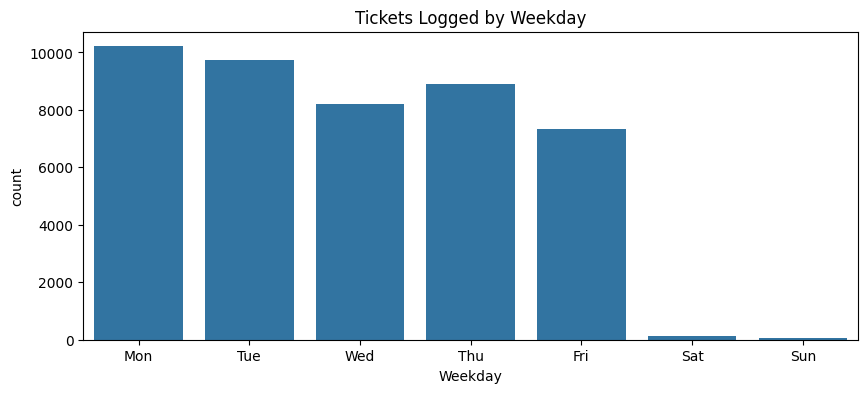

In [63]:

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='ticket_dayofweek')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Weekday")
plt.title("Tickets Logged by Weekday")


## Feature Engineering 🔵

In [64]:
df['total_hours_taken'] = (df['Solution_Completed_At'] - df['Logged_At']).dt.total_seconds() / 3600  # converting to hours

C:\Users\junaid\AppData\Local\Temp\ipykernel_10572\82140343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_hours_taken'] = (df['Solution_Completed_At'] - df['Logged_At']).dt.total_seconds() / 3600  # converting to hours


In [65]:
df['Response_Priority'].unique()

array([ 4,  3, -1,  5,  2,  1])

In [66]:
df['high_priority'] = df['Response_Priority'].apply(lambda x: 1 if x in [1, 2] else 0)

C:\Users\junaid\AppData\Local\Temp\ipykernel_10572\1698819353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_priority'] = df['Response_Priority'].apply(lambda x: 1 if x in [1, 2] else 0)


In [67]:
df['high_priority'].value_counts()

high_priority
0    44190
1      416
Name: count, dtype: int64

### strip Plot for Advanced Visuals

Text(0.5, 1.0, 'Resolution Hours by Priority - Violin Plot')

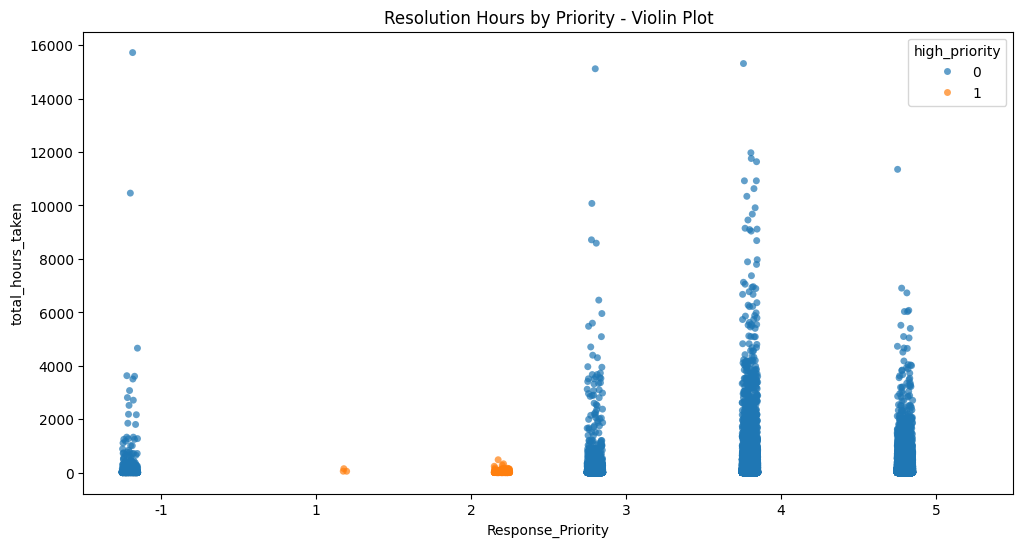

In [68]:
plt.figure(figsize=(12,6))
sns.stripplot(x='Response_Priority', y='total_hours_taken', data=df, hue='high_priority', dodge=True, alpha=0.7)
# sns.stripplot(x='Response_Priority', y='total_hours_taken', data=df, hue='high_priority', dodge=True, alpha=0.7)
# sns.violinplot(x='Response_Priority', y='total_hours_taken', data=df, inner='quartile')
plt.title("Resolution Hours by Priority - Violin Plot")


In [69]:
df

,Asset_ID,Asset_Group,Asset_Subtype,Budget_Code,Ticket_State,Business_Impact,Time_Criticality,Response_Priority,Client_Contact_Score,Issue_Type,...,Solution_Completed_At,Final_Closure_At,Effort_Duration_Hrs,Closure_Rationale,Interaction_Tally,ticket_hour,ticket_dayofweek,ticket_month,total_hours_taken,high_priority
0,SUB000508,subapplication,Web Based Application,WBS000162,Closed,4,4,4,0.601292,incident,...,2013-11-04 13:50:00,2013-11-04 13:51:00,3.871691e+09,Other,1.0,13,6,2,15312.300000,0
1,WBA000124,application,Web Based Application,WBS000088,Closed,3,3,3,0.415050,incident,...,2013-12-02 12:36:00,2013-12-02 12:36:00,4.354786e+09,Software,1.0,15,0,3,15116.866667,0
2,DTA000024,application,Desktop Application,WBS000092,Closed,0,3,-1,0.517551,request for information,...,2014-01-13 15:12:00,2014-01-13 15:13:00,4.843119e+09,No error,1.0,12,3,3,15722.600000,0
3,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.642927,incident,...,2013-11-14 09:31:00,2013-11-14 09:31:00,4.321833e+09,Operator error,1.0,11,1,7,11637.700000,0
4,WBA000124,application,Web Based Application,WBS000088,Closed,4,4,4,0.345258,incident,...,2013-11-08 13:55:00,2013-11-08 13:55:00,3.383903e+09,Other,1.0,11,4,8,10922.900000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,Closed,4,2,4,0.231896,incident,...,2014-03-31 16:29:00,2014-03-31 16:29:00,9.500000e+01,Other,1.0,16,0,3,0.100000,0
46602,SBA000461,application,Server Based Application,WBS000073,Closed,4,2,4,0.805153,incident,...,2014-03-31 15:29:00,2014-03-31 15:29:00,4.283333e+08,User error,1.0,15,0,3,0.433333,0
46603,LAP000019,computer,Laptop,WBS000091,Closed,5,1,5,0.917466,incident,...,2014-03-31 15:32:00,2014-03-31 15:32:00,7.166667e+07,Hardware,1.0,15,0,3,0.066667,0
46604,WBA000058,application,Web Based Application,WBS000073,Closed,4,2,4,0.701278,incident,...,2014-03-31 15:42:00,2014-03-31 15:42:00,1.169444e+08,Software,1.0,15,0,3,0.116667,0


### Encoding categorical variables

In [70]:
# Encode categorical features
cat_cols = ['Issue_Type', 'Asset_Group', 'Asset_Subtype', 'Ticket_State']  # 'Business_Impact' is int, not categorical

df[cat_cols] = df[cat_cols].astype(str)
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


C:\Users\junaid\AppData\Local\Temp\ipykernel_10572\2762396163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].astype(str)


In [71]:

# Feature set and target
feature_cols = ['Interaction_Tally', 'Effort_Duration_Hrs', 'Team_Reassignments', 'ticket_hour', 'ticket_dayofweek', 'total_hours_taken'] + [col for col in df.columns if any(col.startswith(c + '_') for c in cat_cols)]

X = df[feature_cols]
y = df['high_priority']


### Train-test split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


### Models Evaluation

In [ ]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)    
    roc = roc_auc_score(y_test, y_pred)
    
    print(f"\n📌 {name}")
    print("Accuracy:", round(acc, 3))
    print("ROC AUC:", round(roc, 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-"*50)
    
    results[name] = {'accuracy': acc, 'roc_auc': roc}

    


📌 Random Forest
Accuracy: 0.992
ROC AUC: 0.626
Confusion Matrix:
 [[8831    8]
 [  62   21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8839
           1       0.72      0.25      0.38        83

    accuracy                           0.99      8922
   macro avg       0.86      0.63      0.69      8922
weighted avg       0.99      0.99      0.99      8922

--------------------------------------------------

📌 Logistic Regression
Accuracy: 0.991
ROC AUC: 0.5
Confusion Matrix:
 [[8839    0]
 [  83    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8839
           1       0.00      0.00      0.00        83

    accuracy                           0.99      8922
   macro avg       0.50      0.50      0.50      8922
weighted avg       0.98      0.99      0.99      8922

--------------------------------------------------


c:\Users\junaid\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\junaid\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\junaid\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\junaid\miniconda3\Lib\sit


📌 XGBoost
Accuracy: 0.992
ROC AUC: 0.686
Confusion Matrix:
 [[8823   16]
 [  52   31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      8839
           1       0.66      0.37      0.48        83

    accuracy                           0.99      8922
   macro avg       0.83      0.69      0.74      8922
weighted avg       0.99      0.99      0.99      8922

--------------------------------------------------


## ✅ Conclusion: **XGBoost** is the Best Model
### -Highest Recall 
### -Best F1-score 
### -Highest ROC AUC
### -Good accuracy 